In [1]:
import fun
import pandas as pd
df = pd.read_csv('tweets.csv', lineterminator="\n")
allowed_sources = ["Twitter Web App", "Twitter for iPhone", "Twitter for Android"]
df_filtered = df[df['Source of Tweet'].isin(allowed_sources)]
df_filtered.head(30)
len(df_filtered)


2206

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd
import re
from pathlib import Path



'''
print(len(df))

for i in range(len(df)):
  if i == 0:
    a = eval(df.loc[i, 'Conversation'])
    cvsn = '\n'.join(a)
    print(cvsn)
    print(sia.polarity_scores(cvsn))
    print('='*8)
    for c in a:
      print(c)
      print(sia.polarity_scores(c))
    print('='*8)
    print('='*8)
    print('='*8)
    a = [re.sub(r'@(\w+)', '', b) for b in a]
    cvsn = '\n'.join(a)
    print(cvsn)
    print(sia.polarity_scores(cvsn))
    print('='*8)
    for c in a:
      print(c)
      print(sia.polarity_scores(c))
'''
    


sia = SentimentIntensityAnalyzer()

directory_path = Path('data_tweets')
file_pattern = '*.csv'
file_names = [str(file_path) for file_path in directory_path.glob(file_pattern)]
for f in file_names:
  df = pd.read_csv(f, lineterminator="\n")
  df['Sentiment'] = df['Conversation'].apply(lambda x: sia.polarity_scores(re.sub(r'@(\w+)', '', ' '.join(eval(x)))))
  df['Attention'] = df['Sentiment'].apply(lambda x: x['compound']) * df['Likes'].apply(lambda x: 1 if x == 0 else x)
  scaler = RobustScaler()
  df['Attention_Normalized'] = scaler.fit_transform(df[['Attention']])
  df.to_csv(f, index=False)


Text(0, 0.5, 'Price')

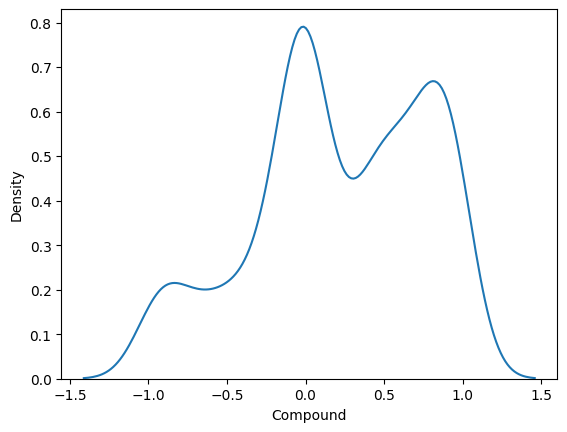

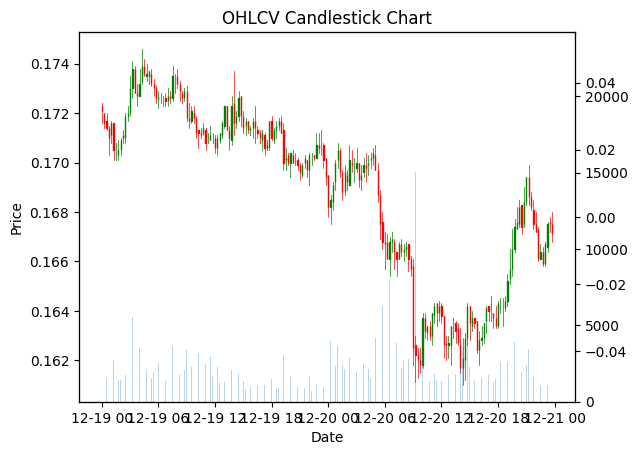

In [112]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import json

start_date = pd.to_datetime('2021-12-19', utc=True)
end_date = pd.to_datetime('2021-12-21', utc=True)
sentiment_df = pd.read_csv('/Users/zibo/fun/twitter/data_tweets_joined/doge_since_2021-12-19_until_2021-12-21_scrape.csv', parse_dates=['Date'], lineterminator="\n")
sentiment_df = sentiment_df.sort_values(by=['Date'])
# sentiment_df['Date'] = sentiment_df['Date'].apply(mdates.date2num)
# print(sentiment_df.head(5))
# print(sentiment_df.tail(5))
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].apply(lambda x: eval(x))
sentiment_df['Compound'] = sentiment_df['Sentiment'].apply(lambda x: x['compound'])
sns.kdeplot(data=sentiment_df['Compound'])

sentiment_df['Smoothed_Attention_Normalized'] = sentiment_df['Attention_Normalized'].rolling(window=10).mean()
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
sentiment_df = sentiment_df[sentiment_df['Date'] >= start_date]
sentiment_df = sentiment_df[sentiment_df['Date'] <= end_date]

# read the data from the CSV file
df = pd.read_csv('/Users/zibo/fun/twitter/data_olhcv/doge_since_2021-12-19_until_2021-12-21_SPOT.csv', parse_dates=['time_period_start'])

# create a new column for the dates in the required format
df['time_period_start'] = df['time_period_start'].apply(mdates.date2num)
# print(df.head(1))

# create a figure and axis object
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()


# plot the candlesticks
candlestick_ohlc(ax1, df[['time_period_start', 'price_open', 'price_high', 'price_low', 'price_close']].values, width=0.001, colorup='g', colordown='r')
ax3.bar(df['time_period_start'], df['trades_count'], width=0.002, alpha=0.3)
ax2.plot(sentiment_df['Date'], sentiment_df['Attention_Normalized'], color='orange', label='Attention_Normalized')
# ax3.set_ylabel('Attention_Normalized')

# format the x-axis as dates
ax1.xaxis_date()

# set the title and axis labels
ax1.set_title('OHLCV Candlestick Chart')
ax3.set_label('Total Trade Amount')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# show the chart
# plt.show()
